### Introduction to Data Visualization with Python
#### Robert Palmere, 2022
#### Email: rdp135@chem.rutgers.edu
-------------------------------------------------------------------------------
##### Material Covered:

1. Generating Figures using Matplotlib
2. Basic plots using Seaborn
3. Interacting with Data using Python Plots

In [9]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import colors
import numpy as np
import math

##### Figures with Matplotlib

In [3]:
# Generate pseudo-random data along a normal distribution
data = np.random.normal(0, 1, 1000) # NumPy 1D array
print(type(data).__name__)

ndarray


##### Plot the data using the "figure" function of matplotlib.pyplot module. Notice, this is not a class but holds statements and methods. This is a folder which contains a __init__.py file which allows use to import from the folder and resuse code. (i.e. $PYTHON_PATH/Matplotlib/pyplot/*). We'll go over this in our session on classes.

In [4]:
print(type(plt))
print(type(plt.figure))

<class 'module'>
<class 'function'>


In [5]:
figure = plt.figure();
print(type(figure))

<class 'matplotlib.figure.Figure'>


<Figure size 432x288 with 0 Axes>

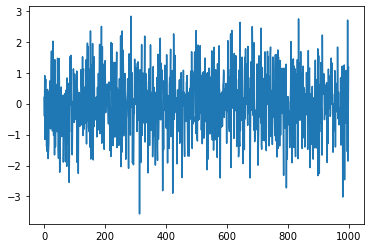

In [6]:
plt.plot(data);

##### We can explicitly show that these data follow a normal distribution by showing a histogram.

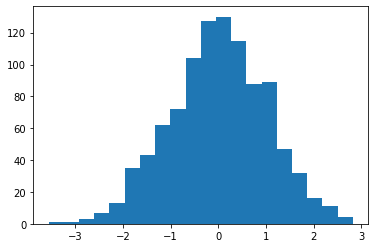

In [7]:
plt.hist(data, bins=20);

##### Let's customize this histogram a bit and add a second data set for comparison.

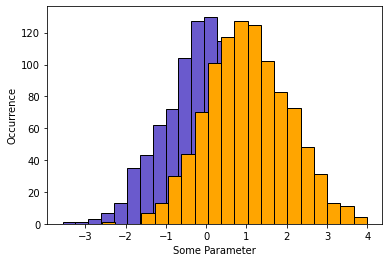

In [8]:
data2 = np.random.normal(0, 1, 1000)+1 # Shifted by 1
b1 = plt.hist(data, bins=20, edgecolor='k', facecolor='slateblue');
b2 = plt.hist(data2, bins=20, edgecolor='k', facecolor='orange');
plt.xlabel('Some Parameter');
plt.ylabel('Occurrence');

##### This plot overlay might be problematic as it hides data set #1 from the reader. We can preserve the binning while still showing these distributions.

##### Let's create a function that takes the centers of these histogram bins and plots a line plot instead.

In [9]:
def histlp(bins):
    heights, edges = bins[0], bins[1]
    points = []
    for i in range(len(edges)):
        if i > 0:
            point = edges[i-1] + ((edges[i] - edges[i-1]) / 2)
            points.append(point)
    return points, heights

(0.0, 150.0)

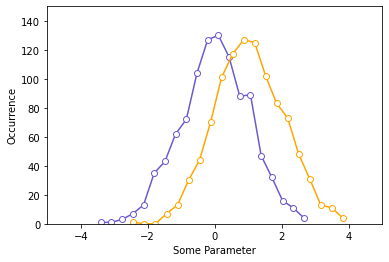

In [10]:
p1, h1 = histlp(b1);
p2, h2 = histlp(b2);
plt.plot(p1, h1, '-o', mfc='w', mec='slateblue', color='slateblue');
plt.plot(p2, h2, '-o', mfc='w', mec='orange', color='orange');
plt.xlabel('Some Parameter');
plt.ylabel('Occurrence');
plt.xlim([-5, 5])
plt.ylim([0, 150])

##### Perhaps we are not interested in the exact bins but prefer a probability density function approximant such as the Kernel Density Estimate.

The function for the kernel density estimator can be found [here](https://en.wikipedia.org/wiki/Kernel_density_estimation).
Matplotlib does not have a function for this, but Seaborn does.

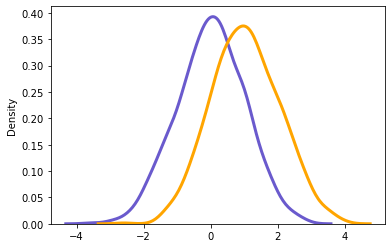

In [11]:
import seaborn as sns
sns.kdeplot(data, c='slateblue', lw=3);
sns.kdeplot(data2, c='orange', lw=3);

##### We can also avoid overlaying these plots all together.

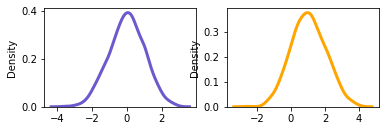

In [12]:
figure = plt.figure()
figure.add_subplot(221) # First position of our 2x2 plot
figure.add_subplot(222) # Second position ""
sns.kdeplot(data, c='slateblue', lw=3, ax=figure.axes[0]);
sns.kdeplot(data2, c='orange', lw=3, ax=figure.axes[1]);

##### The padding for x labels is not accounted for in these plots

plt.tight_layout() provides "padding between the figure edge and the edges of subplots, as a fraction of the font size."

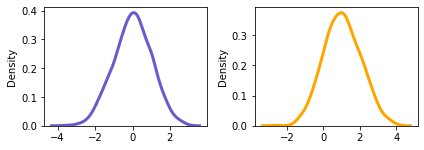

In [13]:
figure = plt.figure()
figure.add_subplot(221)
figure.add_subplot(222)
sns.kdeplot(data, c='slateblue', lw=3, ax=figure.axes[0]);
sns.kdeplot(data2, c='orange', lw=3, ax=figure.axes[1]);
figure.tight_layout()

In [ ]:
##### We can also use the plt.subplots() function
print(type(plt.subplot))
print(type(plt.figure))

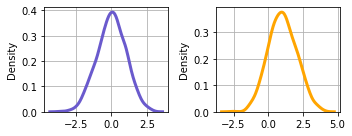

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(5, 2))
sns.kdeplot(data, c='slateblue', lw=3, ax=ax[0]);
sns.kdeplot(data2, c='orange', lw=3, ax=ax[1]);
for i in ax:
    i.grid(True) # Iterate through each subplot and apply grid
fig.tight_layout()

We can also plot error bars on our plots.

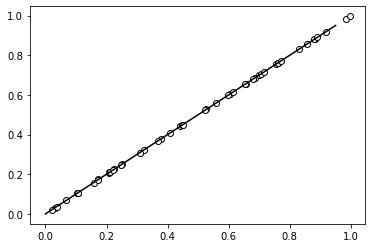

In [15]:
import random
rx = np.arange(0, 1, .05) # arange() 
ry = rx
xd = [random.random() for i in range(50)] # Random points between 0 and 1
yd = xd
plt.plot(rx, ry, 'k');
plt.scatter(xd, yd, fc='w', edgecolor='k')
plt.show()

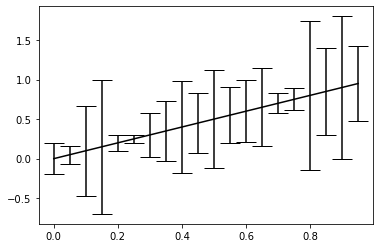

In [16]:
error = [random.random() for i in range(20)] # Saves computational time because no longer have to call .append()
plt.errorbar(rx, ry, color='k', yerr=error, ecolor='k', capsize=10)
plt.show()

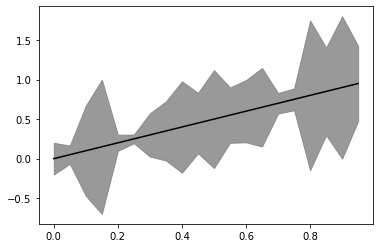

In [19]:
plt.fill_between(rx, ry - error, ry + error,
                 color='gray', alpha=0.8)
plt.plot(rx, ry, 'k');

We can mark specific points and areas we wish to highlight on the plot.

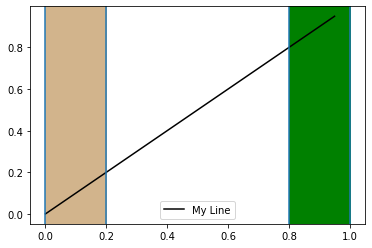

In [20]:
plt.plot(rx, ry, 'k')
plt.axvline(x=0.2)
plt.axvline(x=0.0) # Boundary vline
plt.axvspan(0, 0.2, color='tan')
plt.axvspan(0.8, 1, color='green') # Color span
plt.axvline(x=0.8)
plt.axvline(x=1)
plt.legend(['My Line']) # Legend (requires an interable -- try 'My Line' outside of list)

We can see that the legend isn't formatted right. One of the ways we can do this is by generating a patch and passing this patch to the legend() function of pyplot. 

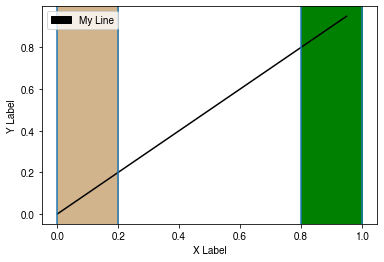

In [22]:
import matplotlib.patches as mpatches
import matplotlib as mpl
line = mpatches.Patch(color='black', label='My Line', linestyle='-')
plt.plot(rx, ry, 'k')
plt.axvline(x=0.2)
plt.axvline(x=0.0)
plt.axvspan(0, 0.2, color='tan')
plt.axvspan(0.8, 1, color='green')
plt.axvline(x=0.8)
plt.axvline(x=1)
plt.xlabel('X Label')
plt.ylabel('Y Label')
plt.legend(handles=[line], loc='upper left')

font = {'family' : 'Helvetica',
        'weight' : 'bold',}

mpl.rc('font', **font)

Seaborn is not just limited to kde plots. It is very good for working with Pandas.DataFrames().

       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      342.000000     342.000000         342.000000   342.000000
mean        43.921930      17.151170         200.915205  4201.754386
std          5.459584       1.974793          14.061714   801.954536
min         32.100000      13.100000         172.000000  2700.000000
25%         39.225000      15.600000         190.000000  3550.000000
50%         44.450000      17.300000         197.000000  4050.000000
75%         48.500000      18.700000         213.000000  4750.000000
max         59.600000      21.500000         231.000000  6300.000000


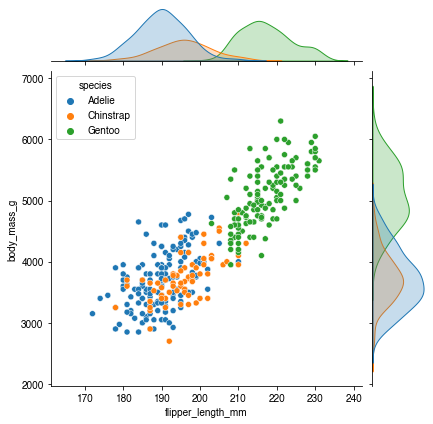

In [23]:
penguins = sns.load_dataset("penguins")
print(penguins.describe()) # From previous session
sns.jointplot(data=penguins, x="flipper_length_mm", y="body_mass_g", hue="species")

Using sns.load_dataset() we can easily load in a Pandas.DataFrame() and plot the data. Here we see that the "Gentoo" species of penguin tends be the larger of the three species we are inspecting and that body mass and flipper length are correlated.

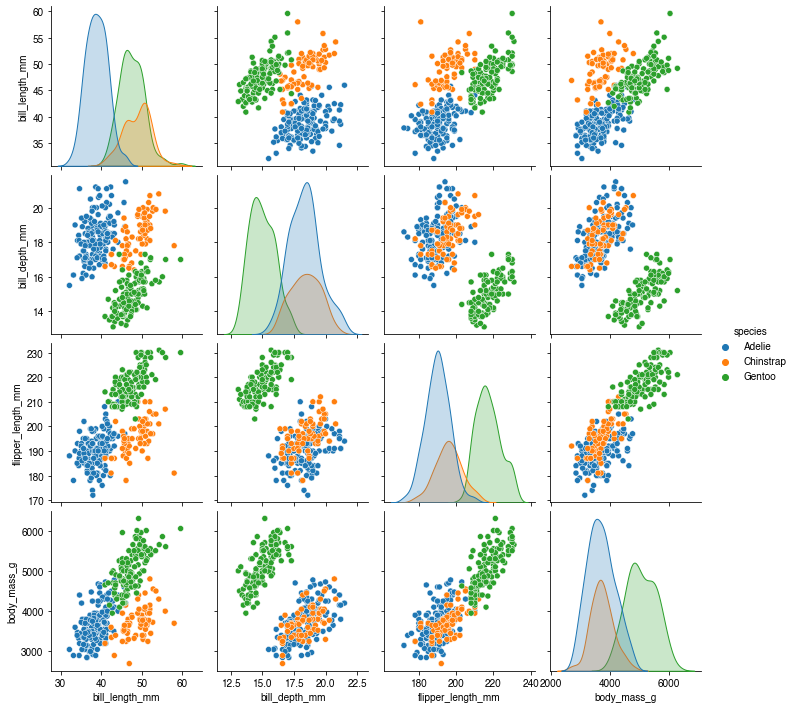

In [24]:
sns.pairplot(data=penguins, hue="species")

Since we see that there is a correlation between body mass and flipper length, we may be able to use a linear regression model for these data (sns.lmplot()).

<class 'matplotlib.axes._subplots.AxesSubplot'>


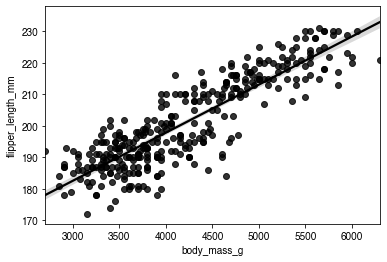

In [25]:
ax = sns.regplot(data=penguins, x="body_mass_g", y="flipper_length_mm", color='k') # Returns mpl.axis
print(type(ax))

This shows a definite correlation between flipper length and body mass across all species. However, it seems that the developers of Seaborn didn't see the use in enabling the user to display the underlying model for linear regression. Let's do it ourselves to get the correlation coefficient (R${^2}$).

In [26]:
print(ax.get_lines.__doc__) # The getlines() function of mpl.axes returns a list of line objects

Return a list of lines contained by the Axes.


In [27]:
lines = ax.get_lines()
print(type(lines[0]))

<class 'matplotlib.lines.Line2D'>


In [28]:
reg_line = lines[0]
x_data, y_data = reg_line.get_xdata(), reg_line.get_ydata()
corr = np.corrcoef(x_data, y_data).astype(float)
rsquared = corr[0, 1]**2
print(rsquared)

0.9999999999999996


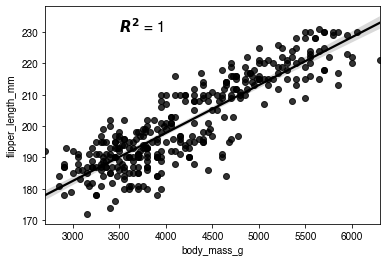

In [29]:
ax = sns.regplot(data=penguins, x="body_mass_g", y="flipper_length_mm", color='k') # Returns mpl.axis
ax.text(3500, 230, f"$R^{2}$ = {round(rsquared)}", fontsize=15);

We can annotate points on our graph using the annotate() function.

Text(3000, 210, 'Correlation')

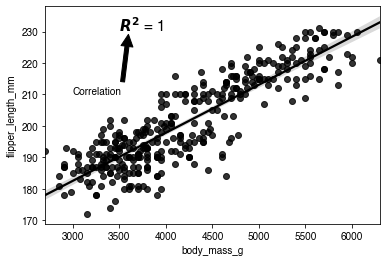

In [30]:
ax = sns.regplot(data=penguins, x="body_mass_g", y="flipper_length_mm", color='k') # Returns mpl.axis
ax.text(3500, 230, f"$R^{2}$ = {round(rsquared)}", fontsize=15);
ax.annotate('Correlation', xy=(3600, 230), xytext=(3000, 210),
            arrowprops=dict(facecolor='black', shrink=0.05))

We can also generate bar plots with both standard pyplot and seaborn.

/var/folders/yn/n0dqsghs1x59rfzz_l8vlqkw0000gq/T/ipykernel_77930/2249544055.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(('', 'one', 'two', 'three', 'four'));


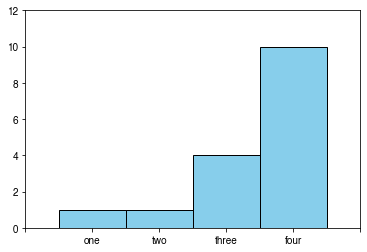

In [31]:
bar_x, bar_y = (1, 2, 3, 4), (1, 1, 4, 10)
fig, ax = plt.subplots()
ax.bar(bar_x, bar_y, ec='k', fc='skyblue', width=1)
ax.set_xlim(0, 5)
ax.set_ylim(0, 12)
ax.set_xticklabels(('', 'one', 'two', 'three', 'four'));

We can make these horizontal bar plots as well. (Gaussian distribution use case)

/var/folders/yn/n0dqsghs1x59rfzz_l8vlqkw0000gq/T/ipykernel_77930/1138575504.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(('', 'one', 'two', 'three', 'four'));


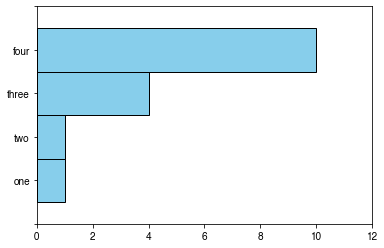

In [32]:
# Notice that the horizontal bar plot parameters / plot parameters are adjusted accordingly
fig, ax = plt.subplots()
ax.barh(bar_x, bar_y, ec='k', fc='skyblue', height=1)
ax.set_xlim(0, 12)
ax.set_ylim(0, 5)
ax.set_yticklabels(('', 'one', 'two', 'three', 'four'));

Seaborn also have this functionality.

   X   Y
0  1   1
1  2   1
2  3   4
3  4  10


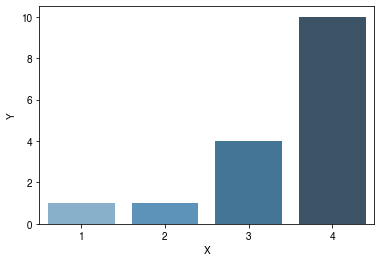

In [33]:
import pandas as pd
df = pd.DataFrame({"X" : bar_x, "Y" : bar_y})
print(df)
sns.barplot(x="X", y="Y", data=df, palette="Blues_d");

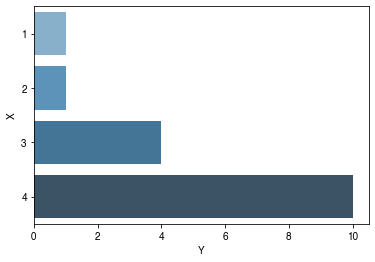

In [34]:
sns.barplot(x="Y", y="X", data=df, palette="Blues_d", orient='h');

A particular use case for examining distributions using a horizontal bar plot.

Mean: -0.369
St. Dev.: +/- 2.296


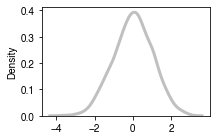

In [35]:
fig, ax = plt.subplots(figsize=(3, 2))
sns.kdeplot(data, c='silver', lw=3, ax=ax);
gx, gy = ax.get_lines()[0].get_xdata(), ax.get_lines()[0].get_ydata()
print('Mean: %0.3f' % np.mean(gx))
print('St. Dev.: +/- %0.3f' % np.std(gx))

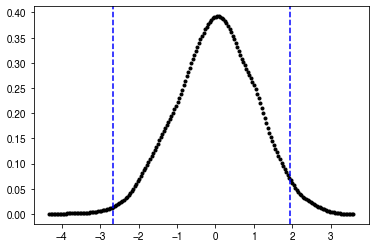

In [36]:
fig, ax = plt.subplots()
ax.scatter(gx, gy, s=3**2, c='k');
ax.axvline(x=np.mean(gx) - np.std(gx), linestyle = '--', color = 'b')
ax.axvline(x=np.mean(gx) + np.std(gx), linestyle = '--', color = 'b')

We want to plot the percentage of points above, below, and in between the standard deviations.

In [37]:
posidx = gx[gx >= (np.mean(gx) + np.std(gx))] # Notice use of numpy indexing
negidx = gx[gx <= (np.mean(gx) - np.std(gx))]

pos = len(posidx) / len(gx) * 100
neg = len(negidx) / len(gx) * 100
mid = 100 - pos - neg
print(neg, mid, pos)

21.0 58.0 21.0


We can plot this to show the distribution on a single horizontal bar.

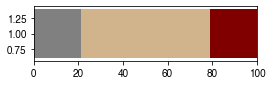

In [38]:
fig, ax = plt.subplots(figsize=(4,1))
plt.barh(1, neg+mid+pos, fc='maroon')
plt.barh(1, neg+mid, fc='tan')
plt.barh(1, neg, fc='gray')
ax.set_xlim(0, 100);

We can also plot "stream" data using Matplotlib.

[[[-3 -3 -3 -3 -3 -3]
  [-2 -2 -2 -2 -2 -2]
  [-1 -1 -1 -1 -1 -1]
  [ 0  0  0  0  0  0]
  [ 1  1  1  1  1  1]
  [ 2  2  2  2  2  2]]

 [[-3 -2 -1  0  1  2]
  [-3 -2 -1  0  1  2]
  [-3 -2 -1  0  1  2]
  [-3 -2 -1  0  1  2]
  [-3 -2 -1  0  1  2]
  [-3 -2 -1  0  1  2]]]
<class 'numpy.ndarray'>


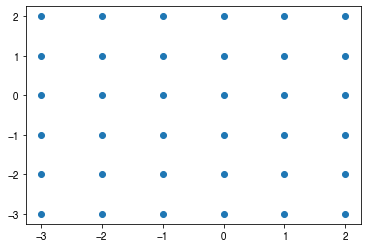

In [39]:
print(np.mgrid[-3:3, -3:3])
print(type(np.mgrid[-3:3, -3:3])) # Creates numpy array of two separate arrays
plt.scatter(np.mgrid[-3:3, -3:3][0], np.mgrid[-3:3, -3:3][1])

[[-13  -8  -5  -4  -5  -8]
 [-12  -7  -4  -3  -4  -7]
 [-11  -6  -3  -2  -3  -6]
 [-10  -5  -2  -1  -2  -5]
 [ -9  -4  -1   0  -1  -4]
 [ -8  -3   0   1   0  -3]]


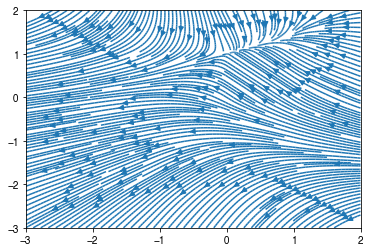

In [40]:
Y, X = np.mgrid[-3:3, -3:3]
U = -1 - X**2 + Y # Velocities for X
V = 1 + X - Y**2 # Velocities for Y
print(U)
plt.streamplot(X, Y, U, V, density=3);

In the following examples we will be using animated plots. I prefer the method of using a generator to path each update to the animate function.

In [41]:
# Ex. of a Generator

def my_generator(num_list):
    for i in num_list:
        yield i*2
        
my_numbers = [1, 2, 3]

print(type(my_generator(my_numbers)))

<class 'generator'>


In [42]:
print(my_generator(my_numbers)) # Just an object - the process we are asking for hasn't ran yet

<generator object my_generator at 0x124214cf0>


In [43]:
for i in my_generator(my_numbers):
    print(i, end=' ') # Now the code has ran

2 4 6 

In [44]:
# Contrast this with a function that has a return
def my_generator(num_list):
    for i in num_list:
        return i*2 # exits scope after at first ith element
    
my_generator(my_numbers)

2

In [45]:
class Atom:
    def __init__(self, name, position, charge):
        self.name = name
        self.x = position[0]
        self.y = position[1]
        self.charge = charge
        
    @property    
    def position(self):
        return (self.x, self.y)
    
    @position.setter
    def position(self, pos):
        self.x = pos[0]
        self.y = pos[1]

In [46]:
Na = Atom('Na+', (-3, 0), 1)
Cl = Atom('Cl-', (3, 0), -1)

(-4.0, 4.0)

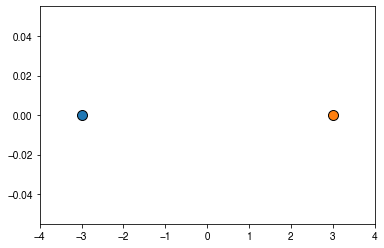

In [47]:
figure = plt.figure();
plt.scatter(Na.x, Na.y, s=10**2, edgecolor='k')
plt.scatter(Cl.x, Cl.y, s=10**2, edgecolor='k')
plt.xlim([-4, 4])

In [49]:
def move(atom):
    '''
    Moves atom along x-coordinate by 0.2 per call
    params: atom object
    '''
    sign = np.sign(atom.x)
    for step in range(1000):
        if sign > 0:
            atom.x = atom.x - 0.05
        elif sign < 0:
            atom.x = atom.x + 0.05
        yield atom.position

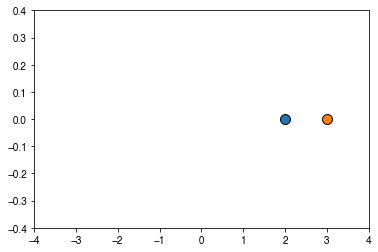

In [50]:
from matplotlib import animation
from IPython.display import HTML # Required for Jupyter Notebook display

fig, ax = plt.subplots()
line = ax.scatter(Na.x, Na.y, s=10**2, edgecolor='k')
ax.scatter(Cl.x, Cl.y, s=10**2, edgecolor='k')

def animate(i):
    line.set_offsets((i[0], i[1]))
    line.axes.axis([-4, 4, -.4, .4])
    return line,

anim = animation.FuncAnimation(fig, animate, move(Na), interval=10)
HTML(anim.to_jshtml())

We can graphically capture the lipid bilayer effector lipid (red) versus the other lipids (white) by plotting this as a 2D grid.

In [12]:
import MDAnalysis as mda

In [13]:
u = mda.Universe('equilibration.gro', 'compressed.xtc') # Using a reduced data set for Github upload
pips = u.select_atoms('resname POP2 and name PO4')
total = u.select_atoms('resname POPS and name PO4') + u.select_atoms('resname POPC and name PO4') + pips

/Users/rdp135/opt/miniconda3/lib/python3.9/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: D
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/Users/rdp135/opt/miniconda3/lib/python3.9/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: G
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))


The bilayer is comprised of two phospholipid monolayers. Let's separate the two so we can analyze them separately.

In [14]:
def splitleaflets(xs, ys, zs):
    '''Split leaflet coordinates into upper and lower numpy arrays'''
    upper = []
    lower = []
    for n, i in enumerate(zs):
        if i > np.mean(zs):
            upper.append(np.asarray([xs[n], ys[n], zs[n]]))
        else:
            lower.append(np.asarray([xs[n], ys[n], zs[n]]))
    return np.asarray(upper), np.asarray(lower)

Our grid dimensions will depend on the number of residues within a particular monolayer.

In [15]:
def getNumResidues(*resnames):
    '''Return the number of residues in *args resnames'''
    res_count = 0
    for res in resnames:
        res_count += len(u.select_atoms('resname {} and name PO4'.format(str(res))))
    return res_count

getNumResidues('POP2', 'POPS', 'POPC') # Total number of lipid residues

1350

We assume that the bilayer is symmetric. Thus we can divide this value by 2 to achieve the number of phospholipids in one of our monolayers. We'll substitute random numbers (either -1 or 1) for each element to visiualize our grid before we implement it on our monolayers.

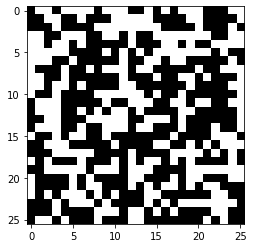

In [16]:
nx = round(np.sqrt(getNumResidues('POP2', 'POPS', 'POPC')/2)) # Estimate grid dimensions by sqrt() of # of lipids in monolayer
ny = nx
grid = np.random.randint(2, size=(nx, ny))*-2+1 # PIP (x, y) coordinates need to be adjusted as boolean which fits this (nx, ny) grid
plt.imshow(grid, cmap=colors.ListedColormap(['white', 'black'])) 
plt.show()

The imshow() function enables visualization of grid data from a PIL image or numpy array.

Reading the __doc__ string of imshow() ($ print(plt.imshow.__doc__$) will give you more information on the interesting and useful features of imshow. We will use the 'interpolate' keyword for a guassian iterpolation between grid points for data smoothing.

Let's apply imshow() in an animation to capture the lipid dynamics in a grid.

In [17]:
def align_grid(u_total, *uobjects):
    '''
    params:
    -------
    
    utotal : MDAnalysis.Universe.select_atoms(ALL_ATOMS) where ALL_ATOMS includes atom selections for all the "PO4" beads which comprise the bilayer
    uobjects : MDAnalysis.Universe.select_atoms(SELE) where SELE includes atom selection for "PO4" beads belonging to PIPs
    other : requires nx, ny grid size beforehand using the above functions
    
    returns:
    --------
    
    target : 2D Numpy array with values of -1 and 1 with 1 indicating the presence of a PIP at this (x, y) coordinate fitted to the nxn grid where n
             is the approx number of lipids along a given coordinate. (e.g. n = round(np.sqrt(getNumResidues('POP2', 'POPS', 'POPC')/2)))
    
    '''
    total_xs, total_ys, total_zs = u_total.positions[:, 0], u_total.positions[:, 1], u_total.positions[:, 2]
    total_upper, total_lower = splitleaflets(total_xs, total_ys, total_zs)
    total_upper_x, total_upper_y, total_upper_z = total_upper[:, 0], total_upper[:, 1], total_upper[:, 2]
    
    targets = []
    for obj in uobjects:
        xs, ys, zs = obj.positions[:, 0], obj.positions[:, 1], obj.positions[:, 2]
        upper, _ = splitleaflets(xs, ys, zs)
        upper_x, upper_y, upper_z = upper[:, 0], upper[:, 1], upper[:, 2]
        x_idxs = np.around(upper_x/np.max(total_upper_x)*nx).astype(int)
        y_idxs = np.around(upper_y/np.max(total_upper_y)*ny).astype(int) # These are (i, j) indices that need to be 1 if true (others are -1)
        target = np.ones(shape=(nx, ny))*-1
        zipped_idxs = np.asarray(list(zip(x_idxs, y_idxs)))
        _, zipidx = np.unique(zipped_idxs, axis=0, return_index=True) # np.unique() sorts result by default and there is no way to turn it off so we'll have to make another list
        new_zipped_idxs = np.asarray([zipped_idxs[i] for i in sorted(zipidx)]) # these are x,y indices to be replaced with 1 on 26x26 grid
        for i in new_zipped_idxs:
            target[i[0]-1, i[1]-1] = 1 # index starts at 0 so subtract 1 from each
        targets.append(target)
    return targets

This function is longer than it likely needs to be, but the variables are explicit which can help when revisitng the code. Notice I added more to the __doc__ string here for reference.

Let's just plot the first step of our trajectory to see what it displays.

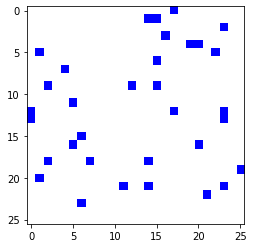

In [18]:
for step in u.trajectory[:1]:
    grids = align_grid(total, pips)
    plt.imshow(grids[0], colors.ListedColormap(['white', 'blue']))
plt.show()

This seems okay. It will be more apparent that we are capturing the behavior in a grid using an animation.

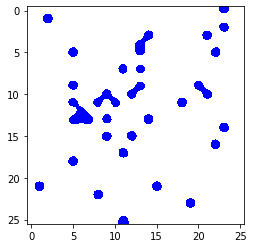

In [19]:
from matplotlib import animation # Required class for animations
from IPython.display import HTML # Required for Jupyter Notebook display

anifig = plt.figure() # The figure we will plot to
img = plt.imshow(grids[0], cmap=colors.ListedColormap(['white', 'blue']), interpolation='spline36') # Initial image to update

def traj():
    for step in u.trajectory:
        grids = align_grid(total, pips) # For all steps of the trajectory determine the grid
        yield grids # Return a "generator" that we will iterate over once
        
def animate(i): # Function to be called at each step of our animation
    img.set_data(i[0]) # update the grid data displayed by imshow() - "i" here are the returned grids from traj()
    return img

anim = animation.FuncAnimation(anifig, animate, traj, interval=100)
HTML(anim.to_jshtml())

The spline interpolation allows for easier visual cluster identification. We can make this a bit more useful for our analysis if we generate heat maps of the entire trajectory.

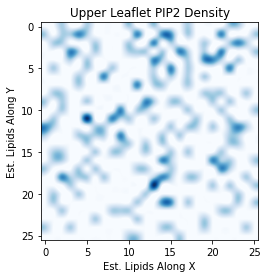

In [20]:
def get_grids():
    for step in u.trajectory:
            grids = align_grid(total, pips)
            yield grids

current_grid = np.asarray(np.hsplit(np.tile(np.zeros(nx), ny), ny))
for i in get_grids():
    current_grid += i[0] # All add grids together (since spance [-1, 1] adding together will show local overall concentration)

fig, ax = plt.subplots()
ax.imshow(current_grid, interpolation='spline36', cmap='Blues')
ax.set_title('Upper Leaflet PIP2 Density')
ax.set_xlabel('Est. Lipids Along X')
ax.set_ylabel('Est. Lipids Along Y')
plt.show()

Using this simplified model of the membrane, we can we see generally where peak cluster density lies.

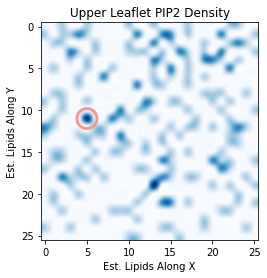

In [21]:
indices = np.where(current_grid == current_grid.max()) # np.where return tuple of indices where grid maximum occurs
fig, ax = plt.subplots()
ax.imshow(current_grid, interpolation='spline36', cmap='Blues')
ax.set_title('Upper Leaflet PIP2 Density')
ax.set_xlabel('Est. Lipids Along X')
ax.set_ylabel('Est. Lipids Along Y')
ax.scatter(indices[1][0], indices[0][0], alpha=0.8, s=20**2, edgecolor='salmon', facecolor='None', linewidths=3)
plt.show()

For fun we can plot the local PIP2 density as a surface although it might be less informative that the above 2D heat map.

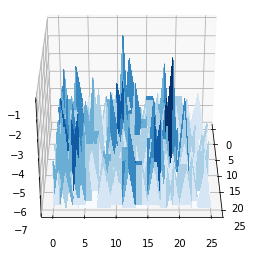

In [27]:
# import matplotlib.pyplot as plt
# import numpy as np
# import matplotlib.animation.FuncAnimation

x3d = np.arange(0, nx)
y3d = np.arange(0, ny)
X, Y = np.meshgrid(x3d, y3d)

# Current grid contains our Z values
fig3d, ax3d = plt.subplots(subplot_kw={"projection": "3d"})

surf = ax3d.plot_surface(X, Y, current_grid, cmap='Blues', # 'Z' <--- 'current_grid'
                       linewidth=0, antialiased=False)

def rotate(): # "Generator"
    for angle in range(0, 360):
        ax3d.view_init(30, angle)
        ax3d.dist = 8 # Closer than default
        yield ax3d # <-- 'yield' makes this a generator
        
def animate(i): # Function to be called at each step of our animation
    i.clear()
    i.plot_surface(X, Y, current_grid, cmap='Blues',
                       linewidth=0, antialiased=False)
    plt.pause(0.001)
    return i,

anim = animation.FuncAnimation(fig3d, animate, rotate, interval=50) # <-- Takes a bit of reading
HTML(anim.to_jshtml())




In [28]:
print(X.shape)

(26, 26)


In [72]:
f(g)

This is a function
This function is called g


In [77]:
None # NULL